# Rozkład chi-kwadrat - $\chi^2(n)$
Zmienna losowa $X$ ma rozkład chi-kwadrat o $n\in\mathbb{N_+}$ stopniach swobody, jeżeli jej gęstość $f$~jest postaci
$$
f(x)=\left.
    \begin{cases}
    \frac{1}{2^{\frac{n}{2}}\Gamma(\frac{n}{2})}x^{\frac{n-2}{2}}\exp\{-\frac{x}{2}\} \quad &\text{dla} \quad x>0\\
    0 \quad &\text{dla} \quad x\leq 0,
    \end{cases}\right.
$$

Wartość oczekiwana i wariancja dane są wzorami
$$
    \mathbb{E}X = n, \quad \text{Var}(X) = 2n.
$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
1. Zdefiniuj zmienną losową dla rozkładu chi kwadrat.
2. Narysuj gęstość dla kilku wybranych stopni swobody. Zwróć uwagę na dziedzinę gęstości.
3. Narysuj dystrybuantę dla kilku wybranych stopni swobody.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.

In [3]:
df = 2
chi2 = stats.chi2(df = df)
chi2

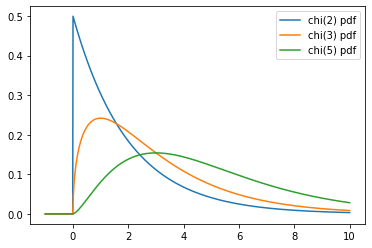

In [4]:
x = np.linspace(-1, 10, 1000)
plt.plot(x, chi2.pdf(x), label="chi(2) pdf")
plt.plot(x, stats.chi2(df=3).pdf(x),  label="chi(3) pdf")
plt.plot(x, stats.chi2(df=5).pdf(x),  label="chi(5) pdf")
plt.legend()
plt.show()

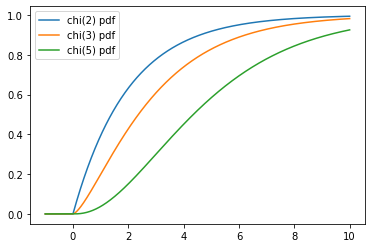

In [6]:
x = np.linspace(-1, 10, 1000)
plt.plot(x, chi2.cdf(x), label="chi(2) pdf")
plt.plot(x, stats.chi2(df=3).cdf(x),  label="chi(3) pdf")
plt.plot(x, stats.chi2(df=5).cdf(x),  label="chi(5) pdf")
plt.legend()
plt.show()

In [10]:
print(chi2.stats("mvsk"))
print(stats.chi2(df=3).stats("mvsk"))
print(stats.chi2(df=5).stats("mvsk"))

(array(2.), array(4.), array(2.), array(6.))
(array(3.), array(6.), array(1.63299316), array(4.))
(array(5.), array(10.), array(1.26491106), array(2.4))


## Zadanie - sprawdzenie empiryczne - do domu
Sprawdzić empirycznie następujące własności:

1. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(0,1)$, to zmienna losowa $Y=X_1^2+\ldots+X_n^2$ ma rozkład chi-kwadrat o $n$ stopniach swobody.
2. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(\mu,\sigma)$ oraz niech $\tilde{S}^2=\frac{1}{n}\sum_{i=1}^n(X_i-\mu)^2$, to zmienna losowa $Y=\frac{n\tilde{S}^2}{\sigma^2}$ ma rozkład chi-kwadrat o $n$ stopniach swobody.
3. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(0,1)$, to zmienna losowa $Y=\sum_{i=1}^n(X_i-\overline{X})^2$ ma rozkład chi-kwadrat o $n-1$ stopniach swobody.
4. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(\mu,\sigma)$ oraz niech $S^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2$, to zmienna losowa $Y=\frac{(n-1)S^2}{\sigma^2}$ ma rozkład chi-kwadrat o $n-1$ stopniach swobody.

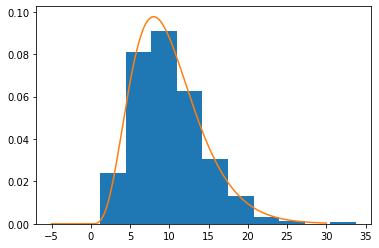

In [69]:
#1
x=np.linspace(-5,30,1000)

n = 10
N = 1000

mu = 0
sigma = 1
norm01 = stats.norm(loc = mu, scale = sigma)

Y = []
Yi = 0

for i in range(N):
    X = norm01.rvs(n)
    Yi = np.sum(X**2)
    Y.append(Yi)
Y;

plt.hist(Y, density = True)

chi2 = stats.chi2(df = n)   

plt.plot(x, chi2.pdf(x))

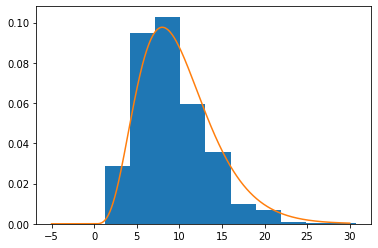

In [70]:
#2
x=np.linspace(-5,30,1000)

n = 10
N = 1000

mu = 1000
sigma = 100
norm = stats.norm(loc = mu, scale = sigma)

Y = []
Yi = 0

for i in range(N):
    X = norm.rvs(n)
    S2 = np.var(X)
    Yi = n*S2 / sigma**2
    Y.append(Yi)
Y;

plt.hist(Y, density = True)

chi2 = stats.chi2(df = n)   

plt.plot(x, chi2.pdf(x))

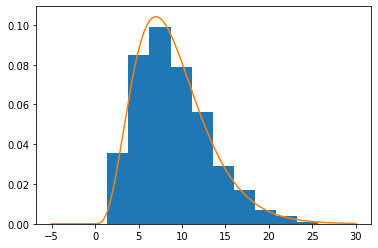

In [72]:
#3
x=np.linspace(-5,30,1000)

n = 10
N = 1000

mu = 0
sigma = 1
norm = stats.norm(loc = mu, scale = sigma)

Y = []
Yi = 0

for i in range(N):
    X = norm.rvs(n)
    S2 = np.var(X)
    Yi = n*S2
    Y.append(Yi)
Y;

plt.hist(Y, density = True)

chi2 = stats.chi2(df = n-1)   

plt.plot(x, chi2.pdf(x))

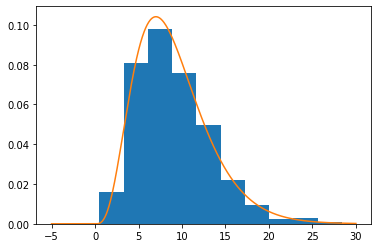

In [73]:
#4
x=np.linspace(-5,30,1000)

n = 10
N = 1000

mu = 1000
sigma = 100
norm = stats.norm(loc = mu, scale = sigma)

Y = []
Yi = 0

for i in range(N):
    X = norm.rvs(n)
    S2 = np.var(X, ddof = 1)
    Yi = (n-1)*S2 / sigma**2
    Y.append(Yi)
Y;

plt.hist(Y, density = True)

chi2 = stats.chi2(df = n-1)   

plt.plot(x, chi2.pdf(x))